# 待改进和解决的问题：
1. 所有数据的读入读出应该走统一的数据目录，而不是存在与脚本同一目录下（problem1）
2. default baby birthday 的 encode 部分，应该和其他时间变量放在同一个函数中进行处理，下个版本改正（problem2）
3. 统计数据类别并按顺序编码的部分应该抽象成一个函数解决

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [48]:
# problem1
df_user_dataset = pd.read_csv('user_data_v1.csv')
df_user_dataset = df_user_dataset.rename(columns = {'Unnamed: 0':'user_id'})
df_input = pd.DataFrame()
df_user_used_coupon = df_user_dataset[~df_user_dataset['UseCoupon'].isnull()]

In [49]:
display(df_user_used_coupon.shape)
# display(df_user_used_coupon.head(20))
# display(df_user_used_coupon['UseCoupon'].value_counts())

In [11]:
# display the value counts of all columns of df_user_used_coupon
for column in df_user_used_coupon.columns:
    if column != 'user_id':
        display(df_user_used_coupon[column].value_counts())

Beijing         148
Shanghai        113
Hangzhou         92
Shenzhen         87
Guangzhou        76
Chengdu          59
Wuhan            43
Changsha         42
Suzhou           36
Xi'an            35
Chongqing        35
Nanjing          33
Tianjin          32
Hefei            29
Ningbo           27
Qingdao          25
Foshan           20
Xiamen           20
Zhengzhou        19
Wuxi             16
Dongguan         15
Nanning          15
Wenzhou          15
Fuzhou           14
Jinan            13
Changzhou        13
Nanchang         12
Nantong          12
Shenyang         12
Dalian            9
               ... 
Cangzhou          1
Zhanjiang         1
Jiujiang          1
Loudi             1
Kowloon           1
Gaomi             1
Wenshan City      1
Zaozhuang         1
Pingdingshan      1
Linhai            1
Maoming           1
Dongyang          1
Yanjiang          1
Leshan            1
Phnom Penh        1
Bangkok           1
Shuangyashan      1
Quzhou            1
Korla             1


Guangdong                           218
Zhejiang                            173
Jiangsu                             150
Beijing                             150
Shanghai                            122
Sichuan                              69
Shandong                             66
Hunan                                57
Hubei                                47
Fujian                               43
Anhui                                42
Shaanxi                              38
Henan                                37
Chongqing                            35
Liaoning                             32
Tianjin                              32
Hebei                                21
Jiangxi                              20
Guangxi                              17
Shanxi                               16
Heilongjiang                         13
Jilin                                12
Inner Mongolia Autonomous Region     11
Yunnan                               11
Guizhou                               9


China            1469
Hong Kong           7
United States       4
Japan               3
Germany             1
Cambodia            1
Mexico              1
Thailand            1
Macau               1
Philippines         1
Name: country, dtype: int64

Apple    1451
Name: device_manufacturer, dtype: int64

Apple iPhone X          175
Apple iPhone 7 Plus     134
Apple iPhone 8 Plus     114
Apple iPhone 6s         109
Apple iPhone 6s Plus    108
Apple iPhone 7           89
Apple iPad 6             88
Apple iPhone 6           84
Apple iPad Air 2         59
Apple iPhone 8           57
Apple iPhone 6 Plus      53
Apple iPhone XS Max      51
Apple iPad Air           51
Apple iPad Mini 2        49
Apple iPad 5             48
Apple iPad Mini 4        42
Apple iPhone XR          36
Apple iPad 4             33
Apple iPad Pro           31
Apple iPhone XS          17
Apple iPhone SE          12
Apple iPad Pro 3         11
Apple iPad Mini           9
Apple iPad 3              8
Apple iPad Mini 3         7
Apple iPad 2              6
Apple iPhone 5s           3
Apple iPad Pro 2          2
Apple iPhone 5c           2
Apple iPhone 5            1
Name: device_type, dtype: int64

7.14.2    1305
7.14.1      70
7.14.0      21
7.13.2      17
7.12.0      15
7.13.1      12
7.9.0       10
7.11.1       8
7.10.1       7
7.8.9        5
7.13.0       4
7.8.6        3
7.8.8        2
7.8.4        2
7.8.7        2
6.7.1        1
7.11.0       1
8.0.0        1
7.10.0       1
7.7.3        1
7.8.5        1
Name: version_name, dtype: int64

wechat    747
mobile    722
guest      10
qq          7
email       2
weibo       1
Name: Account, dtype: int64

2019-03-01 11:36:01 +0000    1
2019-01-24 12:49:02 +0000    1
2015-06-17 06:24:02 +0000    1
2016-06-28 03:43:17 +0000    1
2018-09-08 02:29:38 +0000    1
2018-08-27 04:16:40 +0000    1
2018-12-03 07:49:52 +0000    1
2019-01-28 10:13:38 +0000    1
2018-12-09 03:42:36 +0000    1
2018-04-12 13:28:09 +0000    1
2018-09-12 12:50:24 +0000    1
2016-11-22 04:05:33 +0000    1
2019-03-01 14:21:24 +0000    1
2019-02-16 03:56:15 +0000    1
2019-02-28 11:54:23 +0000    1
2019-02-27 10:17:03 +0000    1
2018-08-08 14:59:45 +0000    1
2019-02-13 03:37:02 +0000    1
2019-02-28 13:22:20 +0000    1
2018-10-08 13:56:00 +0000    1
2019-01-22 13:02:41 +0000    1
2018-11-01 11:54:18 +0000    1
2018-02-12 12:32:22 +0000    1
2019-02-26 13:19:48 +0000    1
2016-10-29 13:11:09 +0000    1
2019-02-21 09:46:04 +0000    1
2016-09-06 05:52:18 +0000    1
2019-02-05 04:40:03 +0000    1
2018-05-17 12:17:21 +0000    1
2019-02-22 11:02:33 +0000    1
                            ..
2017-04-15 05:05:54 +0000    1
2019-02-

201408.0    44
201411.0    44
201410.0    36
201412.0    35
201404.0    32
201405.0    32
201409.0    32
201505.0    31
201503.0    29
201403.0    28
201506.0    28
201502.0    28
201402.0    28
201401.0    28
201510.0    27
201608.0    27
201407.0    27
201602.0    26
201607.0    24
201601.0    23
201501.0    23
201406.0    23
201312.0    23
201610.0    22
201309.0    22
201511.0    22
201306.0    22
201609.0    22
201507.0    22
201310.0    21
            ..
201004.0     3
201104.0     3
201003.0     2
200909.0     2
200910.0     2
201011.0     2
201103.0     2
201107.0     2
201802.0     2
201708.0     2
201712.0     2
201809.0     1
201806.0     1
200703.0     1
200803.0     1
27408.0      1
201909.0     1
200901.0     1
200902.0     1
200904.0     1
200905.0     1
200912.0     1
202007.0     1
201001.0     1
201002.0     1
200002.0     1
200602.0     1
200101.0     1
200102.0     1
200710.0     1
Name: Default Baby Birthday, Length: 121, dtype: int64

1.0    1384
2.0      86
3.0      11
4.0       3
0.0       2
6.0       1
7.0       1
5.0       1
Name: Baby Count, dtype: int64

False    780
True     709
Name: UseCoupon, dtype: int64

150.0    462
50.0     162
10.0      30
30.0      26
20.0      20
0.0        9
60.0       8
40.0       1
Name: CouponPrice, dtype: int64

Bundle     527
General    181
Name: CouponType, dtype: int64

## region map and encode 

In [ ]:
# 地域分布的划分或许需要一种更好的方式，甚至是动态的方式
def encode_region(df_user_used_coupon, df_input):
    region_encode_map = {'Guangdong':1, 'Zhejiang':2, 'Jiangsu':3, 'Shanghai':4, 'Beijing':10, 'Southwest':5, 'Northwest':6, 
                         'Northeast':7, 'Northchina':8, 'Middlechina':9, 'notchinamainland':0}
    province_region_map = {'Guangdong':'Guangdong', 'Zhejiang':'Zhejiang', 'Jiangsu':'Jiangsu', 'Shanghai':'Shanghai',
                          'Sichuan':'Southwest', 'Chongqing':'Southwest', 'Guizhou':'Southwest', 'Yunnan':'Southwest',
                          'Guangxi':'Southwest', 'Inner Mongolia Autonomous Region':'Northeast', 'Liaoning':'Northeast',
                          'Jilin':'Northeast', 'Heilongjiang':'Northeast', 'Xinjiang':'Northwest', 'Gansu':'Northwest',
                          'Qinghai':'Northwest', 'Shaanxi':'Northeast', 'Ningxia Hui Autonomous Region':'Northwest',
                          'Shanxi':'Northchina', 'Shandong':'Northchina', 'Hebei':'Northchina', 'Tianjin':'Northchina',
                          'Henan':'Northchina', 'Hubei':'Middlechina', 'Hunan':'Middlechina', 'Anhui':'Middlechina',
                          'Jiangxi':'Middlechina','Fujian':'Middlechina', 'Hainan':'Middlechina', 'Beijing':'Beijing'}
    notchinamainland_map = {}
    for region in df_user_used_coupon['region'].unique():
        if region not in province_region_map:
            notchinamainland_map[region] = 'notchinamainland'
    df_input['region'] = df_user_used_coupon['region'].map(province_region_map).map(region_encode_map)

In [52]:
# display(type(df_user_used_coupon['region'].map(province_region_map)))
# display(df_user_used_coupon['region'])
# display(df_input['region'].unique())
# display(df_user_used_coupon[df_user_used_coupon['region']=='Hainan'])
display(df_input['region'].unique())

array([ 5,  3,  8,  9,  2,  1,  4, 10,  7,  0,  6])

## device map and encode

In [59]:
def encode_device(df_user_used_coupon, df_input):
    device_encode_map = {'ipad':0, 'iphone':1, 'others':2}
    device_type_map = {}
    for device_type in df_user_used_coupon['device_type'].unique():
        if 'iPad' in device_type:
            device_type_map[device_type] = 'ipad'
        elif 'iPhone' in device_type:
            device_type_map[device_type] = 'iphone'
        else:
            device_type_map[device_type] = 'others'
    df_input['device_type'] = df_user_used_coupon['device_type'].map(device_type_map).map(device_encode_map)
    

In [60]:
encode_device(df_user_used_coupon, df_input)

In [61]:
# display(df_user_used_coupon['device_type'].value_counts())
display(df_input['device_type'].head())
display(df_input['device_type'].value_counts())

12     0
208    0
237    1
265    0
297    0
Name: device_type, dtype: int64

1    1045
0     444
Name: device_type, dtype: int64

## version and account info map and encode

In [86]:
def encode_version(df_input, df_user_used_coupon):
    df_input['version_name'] = df_user_used_coupon['version_name']
    df_input['version_name'] = df_input['version_name'].apply(lambda x: int(x[0]))


In [87]:
encode_version(df_input, df_user_used_coupon)

In [88]:
display(df_input['version_name'].head())
display(df_input['version_name'].value_counts())

12     7
208    7
237    7
265    7
297    7
Name: version_name, dtype: int64

7    1487
8       1
6       1
Name: version_name, dtype: int64

In [110]:
def encode_account(df_input, df_user_used_coupon):
    account_encode_map = dict(zip(df_user_used_coupon['Account'].unique(), [i for i in range(len(df_user_used_coupon['Account'].unique()))]))
    df_input['Account'] = df_user_used_coupon['Account'].map(account_encode_map)

In [111]:
encode_account(df_input, df_user_used_coupon)

In [112]:
display(df_input['Account'].head())
display(df_input['Account'].value_counts())

12     0
208    0
237    1
265    0
297    0
Name: Account, dtype: int64

0    747
1    722
2     10
3      7
5      2
4      1
Name: Account, dtype: int64

## absolute time to relative time

In [170]:
from datetime import datetime
def time_delta_timestamp(now, user_time):
    return (now - datetime.strptime(user_time, "%Y-%m-%d %H:%M:%S +%f")).days
def time_transform_abs2rela(df_input, df_user_used_coupon):
    current_time = datetime.now()
    df_input['Account Created'] = df_user_used_coupon['Account Created'].apply(lambda x:time_delta_timestamp(current_time, x)//365+1)
#     df_input['Default Baby Birthday'] = df_user_used_coupon['Default Baby Birthday'].apply
    

In [171]:
time_transform_abs2rela(df_input, df_user_used_coupon)
# display(df_input['Account Created'])

In [172]:
from datetime import datetime
now = datetime.now()
usertime = datetime.strptime(df_user_used_coupon['Account Created'][12],"%Y-%m-%d %H:%M:%S +%f")
display((now - usertime).days)

215

In [173]:
time.strptime(df_user_used_coupon['Account Created'][12][:-6], "%Y-%m-%d %H:%M:%S")

time.struct_time(tm_year=2018, tm_mon=9, tm_mday=13, tm_hour=0, tm_min=52, tm_sec=0, tm_wday=3, tm_yday=256, tm_isdst=-1)

##  encode baby birthday feature

In [323]:
now = datetime.now()
df_input['Default Baby Birthday'] = df_user_used_coupon['Default Baby Birthday'].astype('int').astype('str').apply(lambda x:x[0:4]+'-'+x[4:])
# display(df_input['Default Baby Birthday'])
df_input['Default Baby Birthday'] = df_input['Default Baby Birthday'].apply(lambda x:
                                                                                (now - datetime.strptime(x, "%Y-%m")).days//365+1)

In [327]:
# problem2
def encode_baby_birtday(df_input, df_user_used_coupon):
    now = datetime.now()
    df_input['Default Baby Birthday'] = df_user_used_coupon['Default Baby Birthday'].astype('int').astype('str').apply(lambda x:x[0:4]+'-'+x[4:])
    df_input['Default Baby Birthday'] = df_input['Default Baby Birthday'].apply(lambda x:
                                                                                (now - datetime.strptime(x, "%Y-%m")).days//365+1)

In [328]:
encode_baby_birtday(df_input, df_user_used_coupon)

In [330]:
display(df_input['Default Baby Birthday'].head(20))

12     4
208    6
237    6
265    6
297    8
319    2
334    5
349    3
369    3
386    8
393    4
453    8
473    9
481    4
497    5
535    7
549    6
673    6
708    5
714    6
Name: Default Baby Birthday, dtype: int64

In [190]:
def encode_baby_count(df_input, df_user_used_coupon):
    df_input['Baby Count'] = df_user_used_coupon['Baby Count']
    df_input['Baby Count'].loc[df_input['Baby Count'] == 1] = 1
    df_input['Baby Count'].loc[df_input['Baby Count'] == 2] = 2
    df_input['Baby Count'].loc[(df_input['Baby Count']!=1) & (df_input['Baby Count']!=2)] =0

In [191]:
encode_baby_count(df_input, df_user_used_coupon)

In [196]:
df_input['Baby Count'] = df_input['Baby Count'].astype(int)

In [193]:
display(df_input[df_input['Baby Count'].isnull()])

,region,device_type,version_name,Account,Account Created,Default Baby Birthday,CouponType,Baby Count


## coupon features encoding

In [277]:
def encode_coupon_type(df_input, df_user_used_coupon):
    coupon_type_encode_map = {'Bundle':0, 'General':1, float('nan'):2}
    df_input['CouponType'] = df_user_used_coupon['CouponType'].map(coupon_type_encode_map)

In [278]:
encode_coupon_type(df_input, df_user_used_coupon)

In [201]:
df_input = df_input.drop(columns = ['Default Baby Birthday'])

In [ ]:
150.0    462
50.0     162
10.0      30
30.0      26
20.0      20
0.0        9
60.0       8
40.0       1

In [274]:
def encode_coupon_price(df_input, df_user_used_coupon):
    coupon_price_encode_map = {150:0, 60:1, 50:2, 40:3, 30:4, 20:5, 10:6, 0:7, float('nan'):0}
    df_input['CouponPrice'] = df_user_used_coupon['CouponPrice'].map(coupon_price_encode_map)

In [275]:
encode_coupon_price(df_input, df_user_used_coupon)

## add label column

In [204]:
df_input['UserCoupon'] = df_user_used_coupon['UseCoupon']

In [331]:
display(df_input.head())

,region,device_type,version_name,Account,Account Created,CouponType,Baby Count,UserCoupon,CouponPrice,Default Baby Birthday
12,5,0,7,0,1,2,1,False,0,4
208,3,0,7,0,1,2,1,False,0,6
237,5,1,7,1,3,0,1,True,0,6
265,8,0,7,0,1,0,1,True,0,6
297,5,0,7,0,2,2,1,False,0,8


In [381]:
display(df_input.columns)

Index(['region', 'device_type', 'version_name', 'Account', 'Account Created',
       'CouponType', 'Baby Count', 'UserCoupon', 'CouponPrice',
       'Default Baby Birthday'],
      dtype='object')

In [368]:
X = df_input.drop(columns=['UserCoupon','CouponType'])
y = df_input['UserCoupon']
y = y.map({True:1, False:0})

In [369]:
display(X.head())

,region,device_type,version_name,Account,Account Created,Baby Count,CouponPrice,Default Baby Birthday
12,5,0,7,0,1,1,0,4
208,3,0,7,0,1,1,0,6
237,5,1,7,1,3,1,0,6
265,8,0,7,0,1,1,0,6
297,5,0,7,0,2,1,0,8


In [370]:
display(y.head())

12     0
208    0
237    1
265    1
297    0
Name: UserCoupon, dtype: int64

In [371]:
from sklearn import feature_selection
display(feature_selection.f_regression(X,y))

(array([8.32787290e-02, 1.27889893e+01, 9.93718733e-24, 2.68389591e+00,
        8.19359670e-01, 4.01342938e+00, 2.03185513e+02, 7.80688069e-01]),
 array([7.72942609e-01, 3.59831067e-04, 1.00000000e+00, 1.01579020e-01,
        3.65514084e-01, 4.53204227e-02, 2.61589725e-43, 3.77073612e-01]))

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [373]:
model = LogisticRegression(multi_class='ovr', solver='liblinear', n_jobs = 1, max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [374]:
display(model.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 400,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [375]:
display(model.coef_)

array([[-0.00251648,  0.48601736, -0.20832179,  0.24110672, -0.02955734,
         0.54445466,  0.85564278,  0.02379275]])

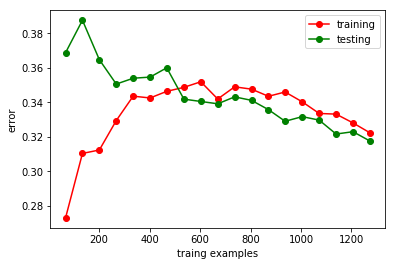

In [376]:
from sklearn.model_selection import learning_curve
train_sizes,train_score,test_score = learning_curve(LogisticRegression(solver = 'liblinear'),X,y,
                                                    train_sizes=[i/20 for i in range(1,20)],cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)
plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('error')
plt.show()

In [377]:
y_pred = model.predict(X_test)

In [378]:
display('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

'Accuracy of logistic regression classifier on test set: 0.69'

In [379]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[227  14]
 [123  83]]


In [380]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77       241
           1       0.86      0.40      0.55       206

   micro avg       0.69      0.69      0.69       447
   macro avg       0.75      0.67      0.66       447
weighted avg       0.74      0.69      0.67       447



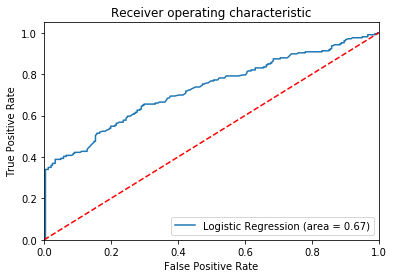

In [355]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()